In [5]:
!pip install kaggle

In [6]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing Face Mask Dataset

In [7]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

100% 163M/163M [00:07<00:00, 29.4MB/s]
100% 163M/163M [00:07<00:00, 21.5MB/s]


In [8]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [9]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


**Importing the Dependencies**

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [11]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3052.jpg', 'with_mask_2968.jpg', 'with_mask_1095.jpg', 'with_mask_1056.jpg', 'with_mask_1693.jpg']
['with_mask_3595.jpg', 'with_mask_3283.jpg', 'with_mask_925.jpg', 'with_mask_2616.jpg', 'with_mask_1861.jpg']


In [12]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_1260.jpg', 'without_mask_3812.jpg', 'without_mask_820.jpg', 'without_mask_3720.jpg', 'without_mask_1739.jpg']
['without_mask_74.jpg', 'without_mask_2562.jpg', 'without_mask_1782.jpg', 'without_mask_3581.jpg', 'without_mask_741.jpg']


In [13]:
print('Number of with mask images:', len(with_mask_files))
print('Number of without mask images:', len(without_mask_files))

Number of with mask images: 3725
Number of without mask images: 3828


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [14]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [15]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [16]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [17]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


**Displaying the Images**

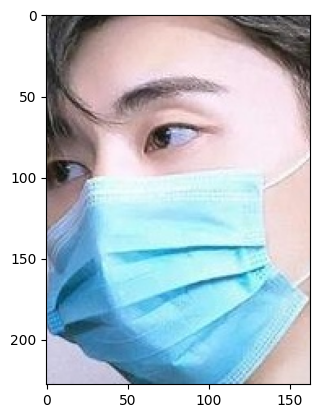

In [18]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

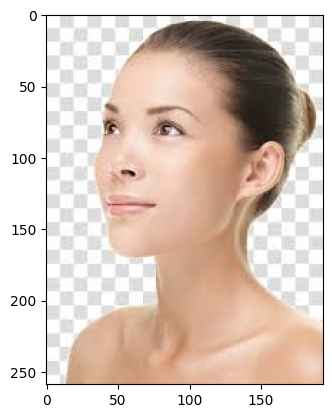

In [19]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [20]:
# convert images to numpy arrays+

with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [21]:
type(data)

list

In [22]:
len(data)

7553

In [23]:
data[0]

array([[[196, 199, 192],
        [198, 201, 194],
        [199, 202, 195],
        ...,
        [185, 188, 193],
        [185, 188, 193],
        [185, 188, 193]],

       [[203, 204, 196],
        [203, 205, 196],
        [203, 205, 197],
        ...,
        [185, 188, 193],
        [185, 188, 193],
        [185, 188, 193]],

       [[184, 182, 172],
        [188, 186, 176],
        [194, 193, 183],
        ...,
        [185, 188, 193],
        [185, 188, 193],
        [186, 189, 194]],

       ...,

       [[163, 162, 158],
        [162, 161, 157],
        [160, 159, 155],
        ...,
        [178, 177, 173],
        [182, 181, 177],
        [181, 180, 176]],

       [[163, 162, 158],
        [161, 160, 156],
        [159, 158, 154],
        ...,
        [182, 181, 177],
        [176, 175, 171],
        [176, 175, 171]],

       [[163, 162, 158],
        [162, 161, 157],
        [160, 159, 155],
        ...,
        [183, 182, 178],
        [181, 180, 176],
        [177, 176, 171]]

In [24]:
type(data[0])

numpy.ndarray

In [25]:
data[0].shape

(128, 128, 3)

In [26]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [27]:
type(X)

numpy.ndarray

In [28]:
type(Y)

numpy.ndarray

In [29]:
print(X.shape)
print(Y.shape)

(7553, 128, 128, 3)
(7553,)


In [30]:
print(Y)

[1 1 1 ... 0 0 0]


**Train Test Split**

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [32]:
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [33]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [34]:
X_train[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[ 54,  58,  61],
        [ 37,  41,  44],
        [ 38,  42,  45],
        ...,
        [ 11,  13,  12],
        [ 13,  15,  14],
        [ 14,  16,  15]],

       [[ 38,  42,  45],
        [ 48,  52,  55],
        [ 33,  37,  40],
        ...,
        [ 11,  13,  12],
        [ 13,  15,  14],
        [ 15,  17,  16]],

       [[ 20,  26,  29],
        [ 49,  50,  54],
        [ 37,  38,  42],
        ...,
        [ 12,  13,  13],
        [ 13,  13,  13],
        [ 13,  15,  13]]

In [35]:
X_train_scaled[0]

array([[[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       [[1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ]],

       ...,

       [[0.21176471, 0.22745098, 0.23921569],
        [0.14509804, 0.16078431, 0.17254902],
        [0.14901961, 0

**Building a Convolutional Neural Networks (CNN)**

In [36]:
import tensorflow as tf
from tensorflow import keras

In [37]:
num_of_classes = 2

model = keras.Sequential()
# Input Layer (Convolutional layers for feature extraction)
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

# Transition to Hidden Layers
model.add(keras.layers.Flatten())

# Hidden Layers (Dense layers for classification)
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


# Output Layer (Sigmoid activation for binary classification)
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [38]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [39]:
# training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 10s 24ms/step - loss: 0.4475 - acc: 0.7977 - val_loss: 0.2985 - val_acc: 0.8777
Epoch 2/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2789 - acc: 0.8898 - val_loss: 0.3202 - val_acc: 0.8711
Epoch 3/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2329 - acc: 0.9102 - val_loss: 0.2257 - val_acc: 0.9008
Epoch 4/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1925 - acc: 0.9213 - val_loss: 0.2284 - val_acc: 0.9041
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.1610 - acc: 0.9399 - val_loss: 0.2102 - val_acc: 0.9124


**Model Evaluation**

In [40]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 0s 10ms/step - loss: 0.2260 - acc: 0.9279
Test Accuracy = 0.9278623461723328


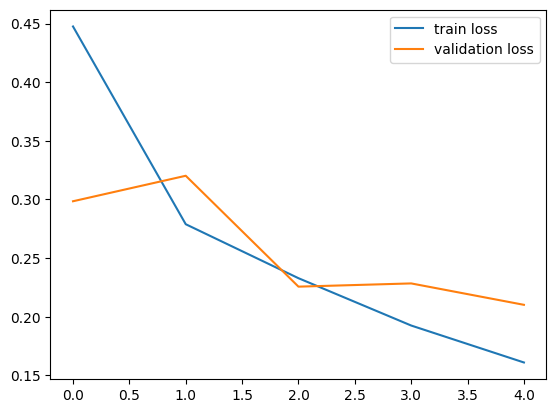

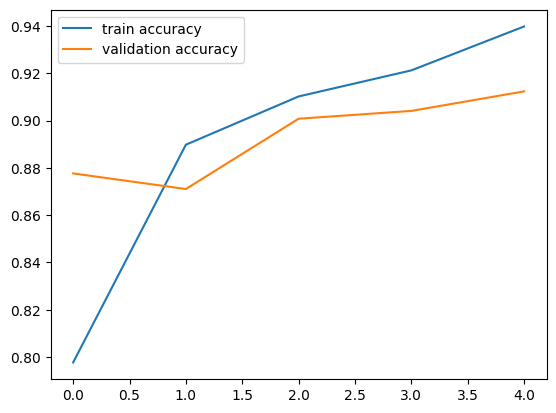

In [41]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

**Predictive System**

Path of the image to be predicted: /content/images_1.jfif


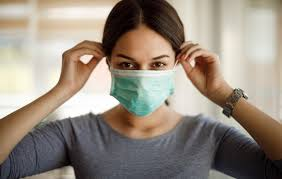

1/1 [==============================] - 1s 621ms/step
[[0.6544637 0.5379973]]
0
The person in the image is wearing a mask


In [42]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is wearing a mask')

Path of the image to be predicted: /content/images_2.jfif


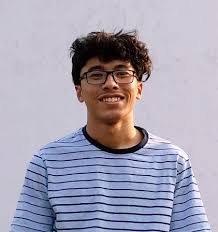

1/1 [==============================] - 0s 18ms/step
[[0.2633454 0.7686588]]
1
The person in the image is not wearing a mask


In [44]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is not wearing a mask')

else:

  print('The person in the image is wearing a mask')